In [1]:
from pyspark.sql import SparkSession
spark=SparkSession.builder.getOrCreate()
import pyspark.sql.functions as F
import pyspark.sql.types as S
import matplotlib.pyplot as plt
spark
oil=spark.read.csv('Data/oil.csv',header=True)

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/11/02 18:19:44 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
23/11/02 18:19:45 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


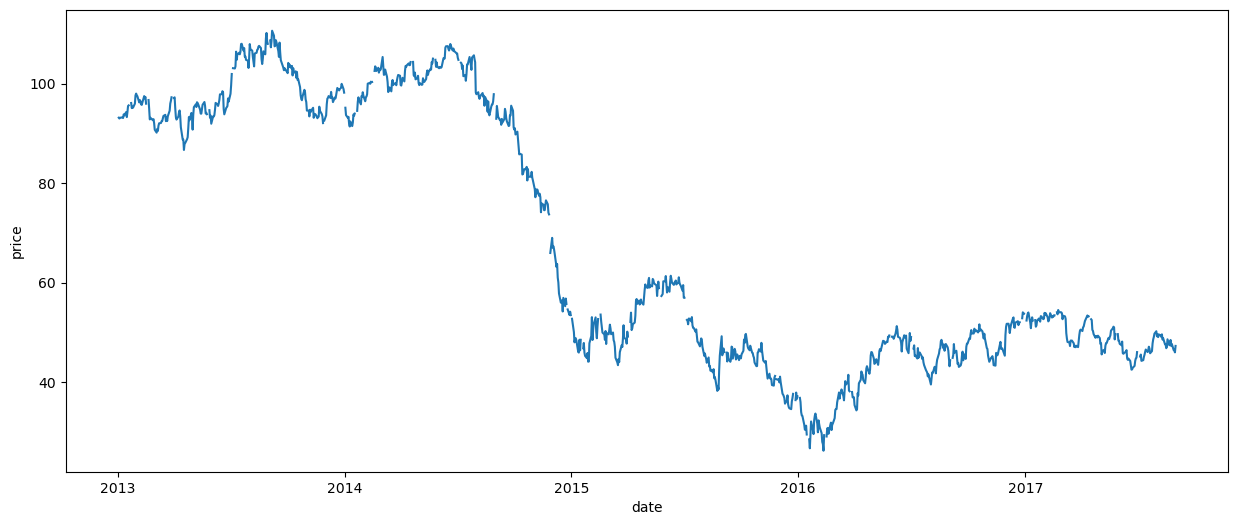

In [2]:
#date wise price
dateof = oil.groupBy('date').agg(F.sum('dcoilwtico').alias('dcoilwtico'))
dateof = dateof.withColumn('date', F.to_date('date'))
dateof = dateof.sort('date')
Y = [val.dcoilwtico for val in dateof.select('dcoilwtico').collect()]
X = [val.date for val in dateof.select('date').collect()]
plt.figure(figsize=(15, 6))
plt.plot(X, Y)
 
plt.ylabel('price')
plt.xlabel('date')



plt.show()


# Missing of some values ,Back tracking to fill them

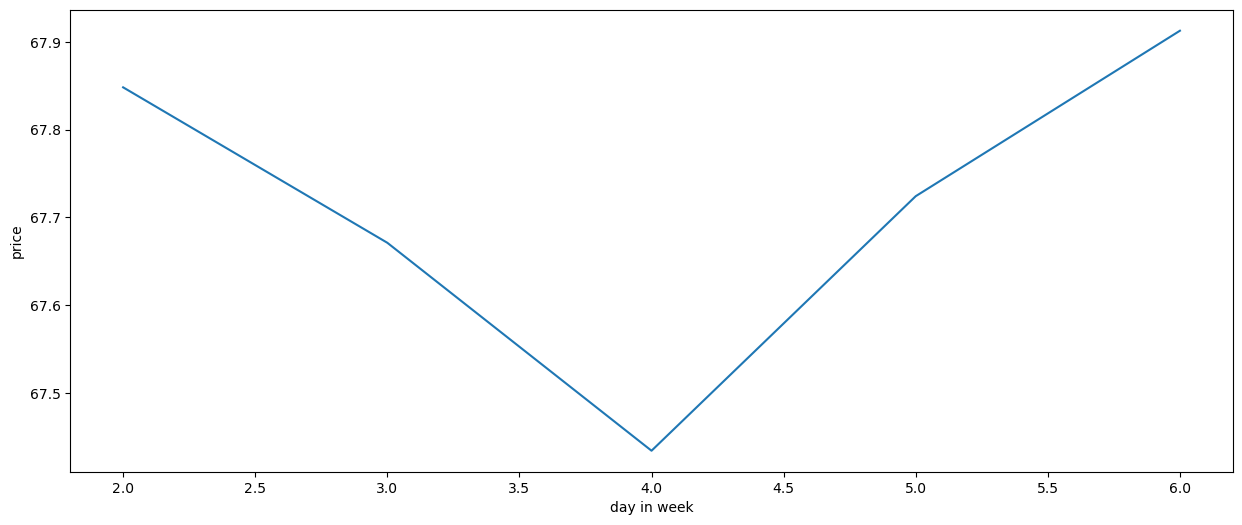

In [3]:
#mean price of oil in days in week

#This graph explains that Saturday and sunday the

dateof = oil.groupBy('date').agg(F.sum('dcoilwtico').alias('dcoilwtico'))
dateof = dateof.withColumn('date', F.dayofweek('date'))
dateof = dateof.groupBy('date').agg(F.mean('dcoilwtico').alias('dcoilwtico'))
dateof = dateof.sort('date')
Y = [val.dcoilwtico for val in dateof.select('dcoilwtico').collect()]
X = [val.date for val in dateof.select('date').collect()]
plt.figure(figsize=(15, 6))
plt.plot(X, Y)
 
plt.ylabel('price')
plt.xlabel('day in week')



plt.show()



# Above graph explains that price are not recorded on saturday and sunday and in reference the prices are unchanged and will be same as the price of friday

In [5]:
#filling the saturday and sunday with friday value
from pyspark.sql.functions import col,last, when
from pyspark.sql.window import Window

windowSpec = Window.orderBy("date")

oil = oil.withColumn("dcoilwtico", when(col("dcoilwtico").isNull(), last("dcoilwtico", True).over(windowSpec)).otherwise(col("dcoilwtico")))

oil.show()


23/11/02 18:30:01 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/11/02 18:30:01 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/11/02 18:30:01 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/11/02 18:30:02 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/11/02 18:30:02 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


+----------+----------+
|      date|dcoilwtico|
+----------+----------+
|2013-01-01|      NULL|
|2013-01-02|     93.14|
|2013-01-03|     92.97|
|2013-01-04|     93.12|
|2013-01-07|      93.2|
|2013-01-08|     93.21|
|2013-01-09|     93.08|
|2013-01-10|     93.81|
|2013-01-11|      93.6|
|2013-01-14|     94.27|
|2013-01-15|     93.26|
|2013-01-16|     94.28|
|2013-01-17|     95.49|
|2013-01-18|     95.61|
|2013-01-21|     95.61|
|2013-01-22|     96.09|
|2013-01-23|     95.06|
|2013-01-24|     95.35|
|2013-01-25|     95.15|
|2013-01-28|     95.95|
+----------+----------+
only showing top 20 rows



In [9]:

oil=oil.na.drop(how='any')
oil.show()

23/11/02 18:32:39 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/11/02 18:32:39 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/11/02 18:32:39 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


+----------+----------+
|      date|dcoilwtico|
+----------+----------+
|2013-01-02|     93.14|
|2013-01-03|     92.97|
|2013-01-04|     93.12|
|2013-01-07|      93.2|
|2013-01-08|     93.21|
|2013-01-09|     93.08|
|2013-01-10|     93.81|
|2013-01-11|      93.6|
|2013-01-14|     94.27|
|2013-01-15|     93.26|
|2013-01-16|     94.28|
|2013-01-17|     95.49|
|2013-01-18|     95.61|
|2013-01-21|     95.61|
|2013-01-22|     96.09|
|2013-01-23|     95.06|
|2013-01-24|     95.35|
|2013-01-25|     95.15|
|2013-01-28|     95.95|
|2013-01-29|     97.62|
+----------+----------+
only showing top 20 rows



23/11/02 18:32:39 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/11/02 18:32:39 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


# with lag value in feature engineering

23/11/02 18:43:42 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/11/02 18:43:42 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/11/02 18:43:42 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/11/02 18:43:42 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/11/02 18:43:42 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/11/02 18:43:42 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/11/02 1

Root Mean Squared Error (RMSE): 1.9994778493851408


23/11/02 18:43:44 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/11/02 18:43:44 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/11/02 18:43:44 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/11/02 18:43:44 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/11/02 18:43:44 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/11/02 18:43:44 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/11/02 1

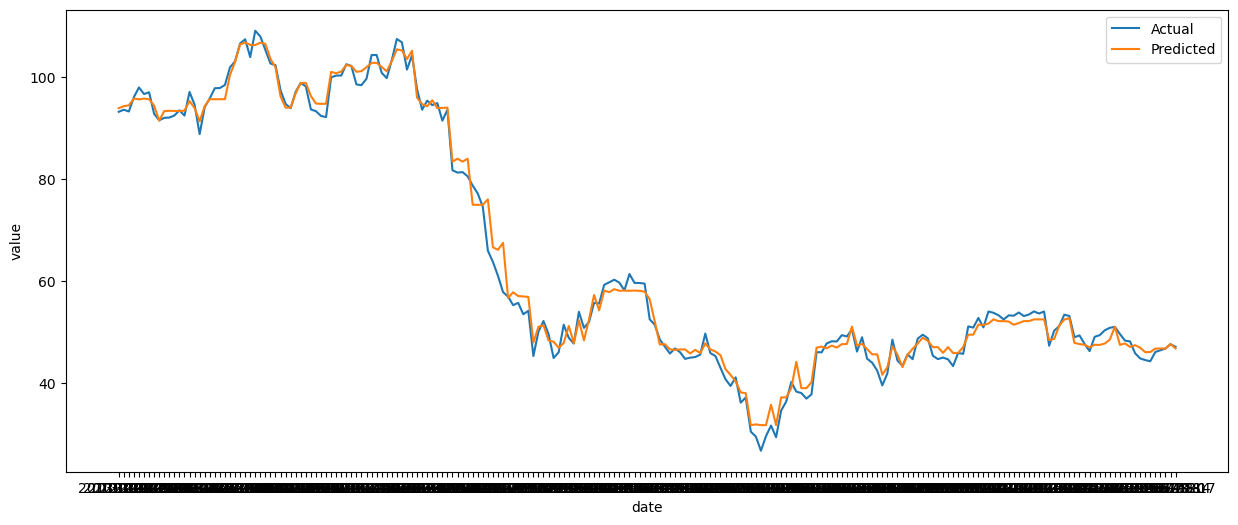

In [16]:
from pyspark.sql.functions import year, month, dayofweek, lag
from pyspark.sql.window import Window
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator

#

oil1=oil
#Feature engineering
oil1 = oil1.withColumn("year", year("date"))
oil1 = oil1.withColumn("month", month("date"))
oil1 = oil1.withColumn("day_of_week", dayofweek("date"))


windowSpec = Window.orderBy("date")
oil1 = oil1.withColumn("lag_oil_price", lag("dcoilwtico", 1).over(windowSpec))

oil1 = oil1.na.drop()
oil1 = oil1.withColumn("lag_oil_price", col("lag_oil_price").cast("float"))
oil1 = oil1.withColumn("dcoilwtico", col("dcoilwtico").cast("float"))

# Assemble features into a vector
feature_cols = ["year", "month", "day_of_week","lag_oil_price"]
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
oil1 = assembler.transform(oil1)
train_data, test_data = oil1.randomSplit([0.8, 0.2], seed=42)


# Initialize and train the Random Forest regressor
rf = RandomForestRegressor(featuresCol="features", labelCol="dcoilwtico", predictionCol="prediction")
rf_model = rf.fit(train_data)
predictions = rf_model.transform(test_data)
evaluator = RegressionEvaluator(labelCol="dcoilwtico", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE):", rmse)


Y = [val.dcoilwtico for val in predictions.select('dcoilwtico').collect()]
X = [val.date for val in predictions.select('date').collect()]
plt.figure(figsize=(15, 6))
plt.plot(X, Y,label='Actual')
Y = [val.prediction for val in predictions.select('prediction').collect()]
X = [val.date for val in predictions.select('date').collect()]

plt.plot(X, Y,label='Predicted')
plt.ylabel('value')
plt.xlabel('date')

plt.legend()

plt.show()


23/11/02 18:43:46 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/11/02 18:43:46 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/11/02 18:43:46 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/11/02 18:43:47 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/11/02 18:43:47 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/11/02 18:43:47 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/11/02 1

Root Mean Squared Error (RMSE): 8.882393897882908


23/11/02 18:43:48 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/11/02 18:43:48 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/11/02 18:43:48 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/11/02 18:43:48 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/11/02 18:43:48 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/11/02 18:43:48 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/11/02 1

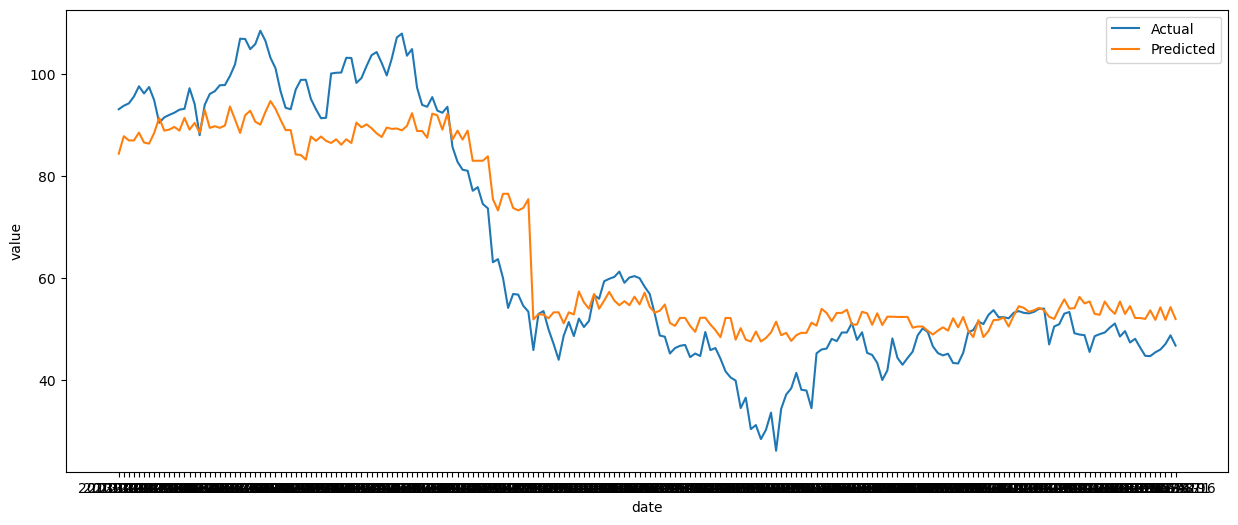

In [17]:
oil1=oil
#Feature engineering
oil1 = oil1.withColumn("year", year("date"))
oil1 = oil1.withColumn("month", month("date"))
oil1 = oil1.withColumn("day_of_week", dayofweek("date"))


windowSpec = Window.orderBy("date")


oil1 = oil1.na.drop()

oil1 = oil1.withColumn("dcoilwtico", col("dcoilwtico").cast("float"))

# Assemble features into a vector
feature_cols = ["year", "month", "day_of_week"]
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
oil1 = assembler.transform(oil1)
train_data, test_data = oil1.randomSplit([0.8, 0.2], seed=42)


# Initialize and train the Random Forest regressor
rf = RandomForestRegressor(featuresCol="features", labelCol="dcoilwtico", predictionCol="prediction")
rf_model = rf.fit(train_data)
predictions = rf_model.transform(test_data)
evaluator = RegressionEvaluator(labelCol="dcoilwtico", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE):", rmse)


Y = [val.dcoilwtico for val in predictions.select('dcoilwtico').collect()]
X = [val.date for val in predictions.select('date').collect()]
plt.figure(figsize=(15, 6))
plt.plot(X, Y,label='Actual')
Y = [val.prediction for val in predictions.select('prediction').collect()]
X = [val.date for val in predictions.select('date').collect()]

plt.plot(X, Y,label='Predicted')
plt.ylabel('value')
plt.xlabel('date')

plt.legend()

plt.show()
